# Kinetic Modeling


In [1]:
import pkg_resources
import matplotlib.pyplot as plt

from pathlib import Path
from moped import Model
from modelbase import ode

print(pkg_resources.get_distribution("moped").version)

1.6.5


For constructing a kinetic model of Glycolosis using moped, the first step is to import the metacyc database from its PGDB files.

In [2]:
# Parsing metacyc can take a bit, so we cached the results here
metacyc_cache_path = Path("../data/metacyc/25.1/metacyc.pickle")

if metacyc_cache_path.exists():
    metacyc = Model.load_from_pickle(metacyc_cache_path)
else:
    metacyc = Model()
    metacyc.read_from_pgdb(pgdb_path="../data/metacyc/25.1/data")
    metacyc.to_pickle(metacyc_cache_path)

We create a submodel of all reactions that are in the "GLYCOLOSIS" pathway of the moped object containing MetaCyc.

Afterwards, we use transform the moped object into a modelbase object

In [3]:
ode_model = metacyc.create_submodel(
    metacyc.get_reactions_of_pathway("GLYCOLYSIS")
).to_kinetic_model()

We set all initial conditions to 1, except for the initial compounds, G6P. The initial concentration of G6P is set to 5.

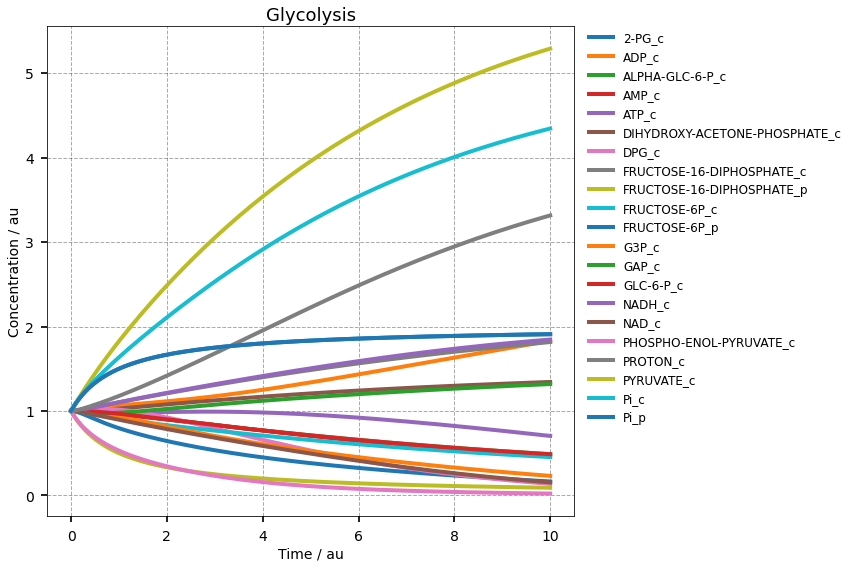

In [4]:
# Create a set of initial concentrations
y0 = {i: 1 for i in ode_model.get_compounds()}
y0["GLC_6_P_c"] = 5

# Simulate the model
s = ode.Simulator(ode_model)
s.initialise(y0)
t, y = s.simulate(10)

compounds = [
    "2-PG_c",
    "ADP_c",
    "ALPHA-GLC-6-P_c",
    "AMP_c",
    "ATP_c",
    "DIHYDROXY-ACETONE-PHOSPHATE_c",
    "DPG_c",
    "FRUCTOSE-16-DIPHOSPHATE_c",
    "FRUCTOSE-16-DIPHOSPHATE_p",
    "FRUCTOSE-6P_c",
    "FRUCTOSE-6P_p",
    "G3P_c",
    "GAP_c",
    "GLC-6-P_c",
    "NADH_c",
    "NAD_c",
    "PHOSPHO-ENOL-PYRUVATE_c",
    "PROTON_c",
    "PYRUVATE_c",
    "Pi_c",
    "Pi_p",
]

fig, ax = plt.subplots(figsize=(12, 8))
s.plot_selection(
    compounds, ax=ax, title="Glycolysis", xlabel="Time / au", ylabel="Concentration / au"
)
plt.show()